In [0]:
from __future__ import print_function, division, absolute_import

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# set eager api
tf.enable_eager_execution()
tfe=tf.contrib.eager

W0810 18:51:51.828624 139979776878464 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [0]:
# weight and bias
W=tfe.Variable(np.random.randn())
b=tfe.Variable(np.random.randn())

# define linear regression
def linear_regression(inputs):
  return inputs*W+b

# define mse
def mean_square_fn(model_fn, inputs, labels):
  return tf.reduce_sum(tf.pow(model_fn(inputs)-labels,2))/(2*n_samples)

In [0]:
# sgd optimizer

optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# compute gradients
grad=tfe.implicit_gradients(mean_square_fn)

In [6]:
# initialize cost before optimizing
print("initial cost %f"%(mean_square_fn(linear_regression, train_X, train_Y)), 
     "W", W.numpy(), "B",b.numpy())

initial cost 8.195670 W 0.028711407 B -1.8082391


W0810 18:51:55.077224 139979776878464 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1205: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1 cost 2.793589 W 0.28981936 B -1.7682828
Epoch 100 cost 0.386551 W 0.56710297 B -1.4377252
Epoch 200 cost 0.319777 W 0.53102267 B -1.1819323
Epoch 300 cost 0.267405 W 0.499069 B -0.955395
Epoch 400 cost 0.226326 W 0.47076985 B -0.7547667
Epoch 500 cost 0.194107 W 0.4457073 B -0.5770844
Epoch 600 cost 0.168837 W 0.42351112 B -0.41972363
Epoch 700 cost 0.149016 W 0.40385357 B -0.28036022
Epoch 800 cost 0.133469 W 0.38644424 B -0.15693606
Epoch 900 cost 0.121276 W 0.37102604 B -0.047627922
Epoch 1000 cost 0.111712 W 0.3573712 B 0.049178604


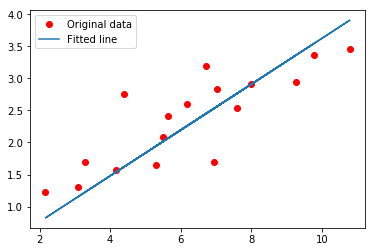

In [7]:
# training
for step in range(num_steps):
  optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))
  
  if (step+1)%display_step==0 or step==0:
    print("Epoch %i"%(step+1), "cost %f"%mean_square_fn(linear_regression, train_X, train_Y),
         "W", W.numpy(), "B",b.numpy())
    
plt.plot(train_X, train_Y, 'ro', label="Original data")
plt.plot(train_X, np.array(W*train_X+b), label="Fitted line")
plt.legend()
plt.show()